# Linear Regression

---
Loyola University Chicago  
COMP 379-001/479-001, Spring 2025, Machine Learning  
Instructor: Daniel Moreira (dmoreira1@luc.edu)  
More at https://danielmoreira.github.io/teaching/ml_spr25/

---

Practical examples and exercises about Linear Regression

Language: Python 3  

Needed libraries:
* NumPy (https://numpy.org/)
* Pandas (https://pandas.pydata.org/)
* Scikit-learn (https://scikit-learn.org/)
* matplotlib (https://matplotlib.org/)


In [ ]:
# imported libraries
import numpy as np
print('NumPy version', np.__version__)

import pandas as pd
print('Pandas version', pd.__version__)

import matplotlib
print('Matplotlib version', matplotlib.__version__)

import sklearn
print('SciKit version', sklearn.__version__)

NumPy version 1.26.4
Pandas version 2.2.2
Matplotlib version 3.10.0
SciKit version 1.6.1


## Toy-case Data Loading

In [ ]:
# downloads the toycase dataset for learning Linear Regression
!pip install gdown==v5.1.0
!gdown 1t67kS-U5bkSmk6HQcG2Cp9uOiYneCz8G

  Attempting uninstall: gdown
    Found existing installation: gdown 5.2.0
    Uninstalling gdown-5.2.0:
      Successfully uninstalled gdown-5.2.0
Downloading...
From: https://drive.google.com/uc?id=1t67kS-U5bkSmk6HQcG2Cp9uOiYneCz8G
To: /content/toycase_2.csv
100% 3.81k/3.81k [00:00<00:00, 11.4MB/s]


In [ ]:
# loads the toy-case dataset into memory
df_data = pd.read_csv('/content/toycase_2.csv')

# prints info
print('Data shape:', df_data.shape)

# first 5 samples
df_data.head(5)

Data shape: (100, 2)


,x,y
0,1.097627,6.127731
1,1.430379,9.191963
2,1.205527,8.082243
3,1.089766,5.733055
4,0.847310,8.030181


In [ ]:
# data in numpy array format
x = df_data['x'].values.reshape(len(df_data), 1)
print('x shape:', x.shape)

y = df_data['y'].values.reshape(len(df_data), 1)
print('y shape:', y.shape)

x shape: (100, 1)
y shape: (100, 1)


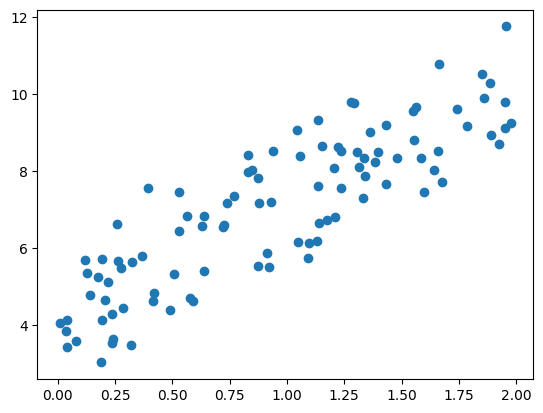

In [ ]:
# data graph
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

## Univariate Gradient Descent

In [ ]:
# function that performs gradient descent on the given univariate data
#
# Parameters
# x: values of the 1-D explanatory variable in row-wise sample format
# y: values of the response variable in row-wise sample format
# epochs: number of iterations for applying GD
# alpha: GD learning rate
# rseed: seed of random number generator to ensure reproducibility
#
# Returns (1) theta_0 (intercept), (2) theta_1 (slope),
# (3) history of costs (to show convergence), and
# (4) history of thetas (to support convergence analysis).
def my_univar_grad_desc(x, y, epochs=1000, alpha=0.1, rseed=0):
  # random seed application
  rseed = 0
  np.random.seed(rseed)

  # theta values random initialization
  theta_0 = np.random.rand(1)
  theta_1 = np.random.rand(1)

  # lists of costs and thetas (for history tracking)
  costs = []
  thetas = [(theta_0, theta_1)]

  # number of samples
  n = len(x)

  # for each epoch...
  for t in range(epochs):
    # current y_hat
    y_hat = theta_0 + theta_1 * x

    # theta gradients
    theta_0_grad = 1/n * np.sum(y_hat - y)
    theta_1_grad = 1/n * np.sum((y_hat - y) * x)

    # temporary theta values
    theta_0_temp = theta_0 - alpha * theta_0_grad
    theta_1_temp = theta_1 - alpha * theta_1_grad

    # theta value update
    theta_0 = theta_0_temp
    theta_1 = theta_1_temp

    # updates the history of costs (MSE)
    costs.append(1/n * np.sum((y_hat - y) ** 2))

    # updates the history of thetas
    thetas.append((theta_0, theta_1))

  # returns the computed values
  return theta_0, theta_1, costs, thetas


In [ ]:
# calls the GD function
theta_0, theta_1, costs, thetas = my_univar_grad_desc(x, y)
print('theta_0 and theta_1:', theta_0, theta_1)

theta_0 and theta_1: [4.22215099] [2.96846759]


In [ ]:
# predicts a y value for a given x
x_pred = float(input('Provide a value for x: '))
y_pred = theta_0 + theta_1 * x_pred

print('new x:', x_pred)
print('predicted y:', y_pred)

Provide a value for x: 8
new x: 8.0
predicted y: [27.96989168]


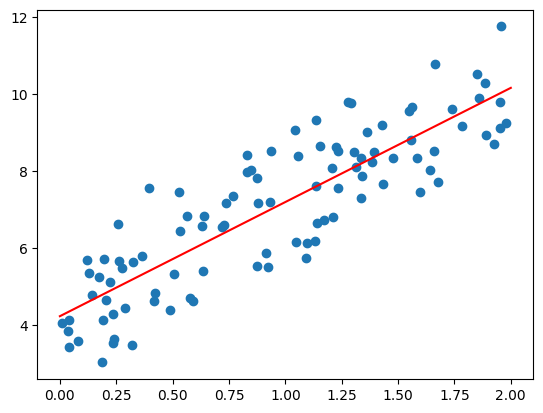

In [ ]:
# plots the obtained hypothesis
x_pred = np.array([[0], [2]])
y_pred = theta_0 + theta_1 * x_pred

plt.scatter(x, y)
plt.plot(x_pred, y_pred, '-r')
plt.show()

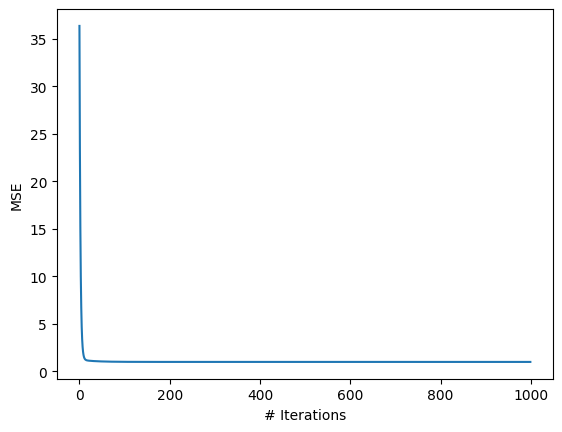

In [ ]:
# history of cost (MSE history)
plt.plot(range(len(costs)), costs)
plt.xlabel("# Iterations")
plt.ylabel("MSE")
plt.show()

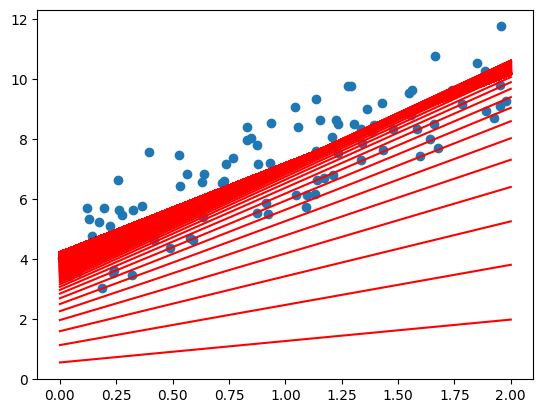

In [ ]:
# model convergence
plt.scatter(x, y)

for (theta_0, theta1) in thetas:
  x_predict = np.array([[0], [2]])
  y_predict = theta_0 + theta1 * x_predict
  plt.plot(x_predict, y_predict, '-r')

plt.show()

## Learning Rate Analysis

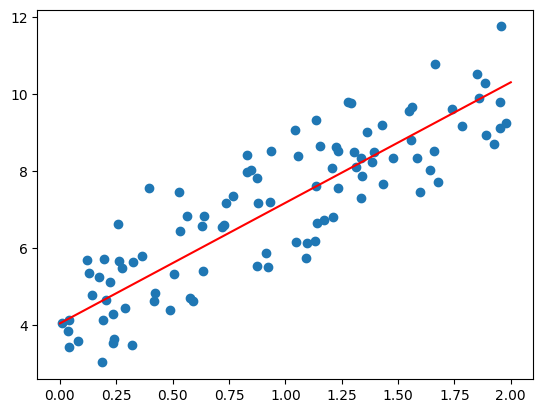

In [ ]:
# alpha = 0.01 (previous: 0.1)
theta_0, theta_1, costs, thetas = my_univar_grad_desc(x, y, alpha=0.01)

x_predict = np.array([[0], [2]])
y_predict = theta_0 + theta_1 * x_predict

plt.scatter(x, y)
plt.plot(x_predict, y_predict, '-r')
plt.show()

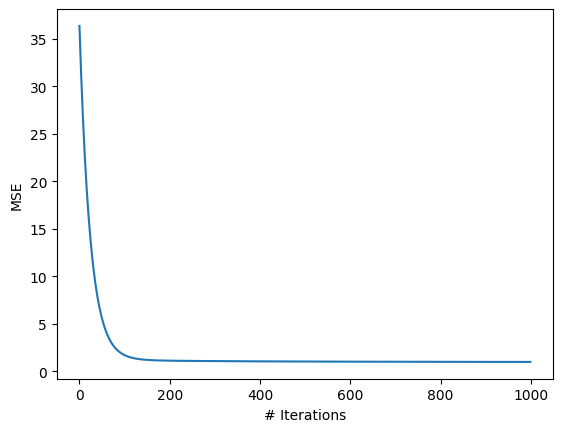

In [ ]:
# history of cost (MSE history)
# alpha = 0.01
plt.plot(range(len(costs)), costs)
plt.xlabel("# Iterations")
plt.ylabel("MSE")
plt.show()

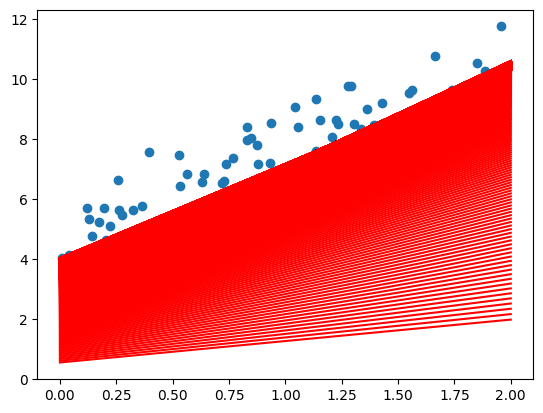

In [ ]:
# model convergence
# alpha = 0.01
plt.scatter(x, y)

for (theta_0, theta1) in thetas:
  x_predict = np.array([[0], [2]])
  y_predict = theta_0 + theta1 * x_predict
  plt.plot(x_predict, y_predict, '-r')

plt.show()

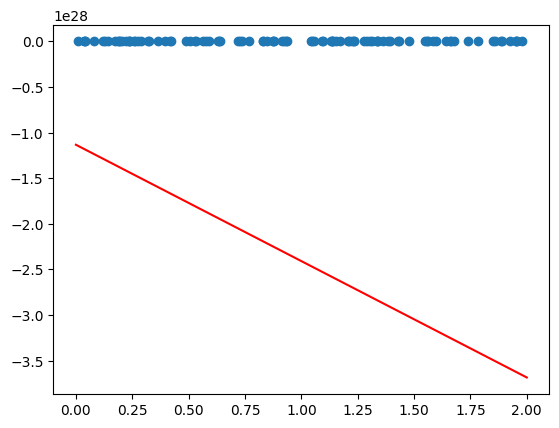

In [ ]:
# alpha = 1.0
theta_0, theta_1, costs, thetas = my_univar_grad_desc(x, y, alpha=1.0)

x_predict = np.array([[0], [2]])
y_predict = theta_0 + theta_1 * x_predict

plt.scatter(x, y)
plt.plot(x_predict, y_predict, '-r')
plt.show()

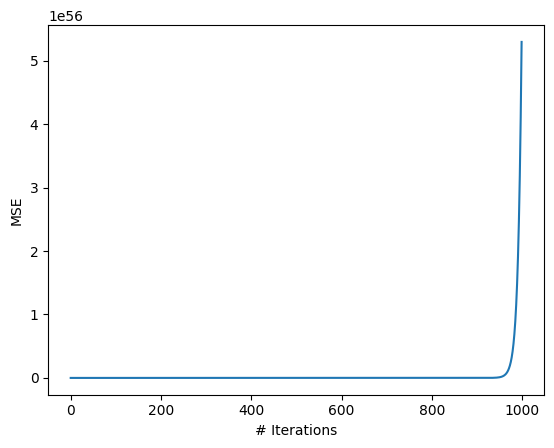

In [ ]:
# history of cost (MSE history)
# alpha = 1.0
plt.plot(range(len(costs)), costs)
plt.xlabel("# Iterations")
plt.ylabel("MSE")
plt.show()

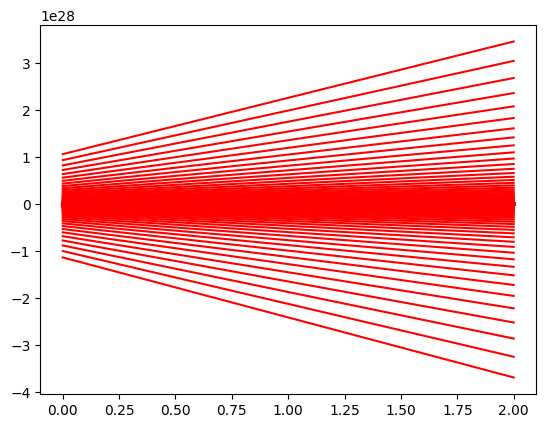

In [ ]:
# model convergence
# alpha = 1.0
plt.scatter(x, y)

for (theta_0, theta1) in thetas:
  x_predict = np.array([[0], [2]])
  y_predict = theta_0 + theta1 * x_predict
  plt.plot(x_predict, y_predict, '-r')

plt.show()

## Multivariate Gradient Descent

In [ ]:
# function that performs gradient descent on the given multivariate data
#
# Parameters
# x: values of the m-D explanatory variable in row-wise sample format
# y: values of the response variable in row-wise sample format
# epochs: number of iterations for applying GD
# alpha: GD learning rate
# rseed: seed of random number generator to ensure reproducibility
#
# Returns (1) theta values (row-wise) and
# (2) history of costs (to show convergence).
def my_multivar_grad_desc(x, y, epochs=1000, alpha=0.1, rseed=0):
  # add x0 = 1.0 to each x instance
  x_b = np.c_[np.ones((len(x), 1)), x].transpose()

  # number of data dimensions and samples of x, respectively
  m, n = x_b.shape

  # random seed application and theta random initialization
  rseed = 0
  np.random.seed(rseed)
  theta = np.random.randn(m, 1)

  # lists of costs (for convergence history tracking)
  costs = []

  # for each epoch...
  for t in range(epochs):
    # current y_hat
    y_hat = theta.transpose() @ x_b

    # theta gradients
    theta_grads = 1/n * (x_b @ (y_hat.transpose() - y))

    # theta update
    theta = theta - alpha * theta_grads

    # updates the history of costs (MSE)
    costs.append(np.sum((y_hat.transpose() - y) ** 2) / n)

  # returns the computed values
  return theta, costs

In [ ]:
# calls the GD function
theta, costs = my_multivar_grad_desc(x, y)
print('theta values:\n', theta)

theta values:
 [[4.22215107]
 [2.96846752]]


In [ ]:
# predicts a y value for a given x
x_pred = float(input('Provide a value for x: '))
y_pred = theta[0] + theta[1] * x_pred

print('new x:', x_pred)
print('predicted y:', y_pred)

Provide a value for x: 8
new x: 8.0
predicted y: [27.96989122]


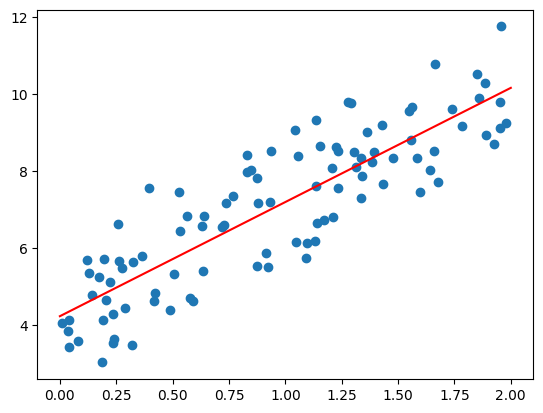

In [ ]:
# plots the obtained hypothesis
x_pred = np.array([[0], [2]])
y_pred = theta[0] + theta[1] * x_pred

plt.scatter(x, y)
plt.plot(x_pred, y_pred, '-r')
plt.show()

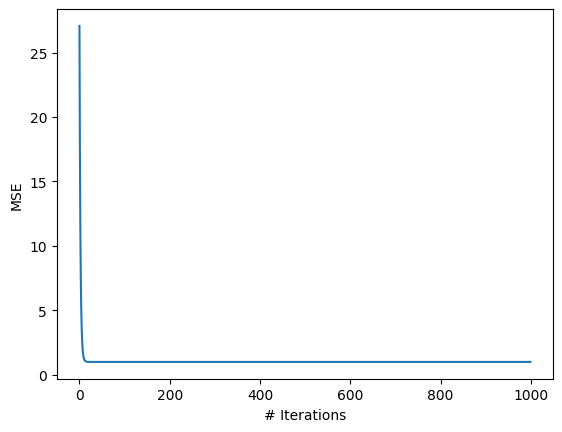

In [ ]:
# history of cost (MSE history)
plt.plot(range(len(costs)), costs)
plt.xlabel("# Iterations")
plt.ylabel("MSE")
plt.show()

## Stochastic Gradient Descent

In [ ]:
# function that performs stochastic gradient descent
# on the given multivariate data
#
# Parameters
# x: values of the m-D explanatory variable in row-wise sample format
# y: values of the response variable in row-wise sample format
# epochs: number of iterations for applying SGD
# alpha: SGD learning rate
# rseed: seed of random number generator to ensure reproducibility
#
# Returns (1) theta values (row-wise) and
# (2) history of costs (to show convergence).
def my_stochastic_grad_desc(x, y, epochs=1000, alpha=0.1, rseed=0):
  # add x0 = 1.0 to each x instance
  x_b = np.c_[np.ones((len(x), 1)), x].transpose()

  # number of data dimensions and samples of x, respectively
  m, n = x_b.shape

  # random seed application and theta random initialization
  rseed = 0
  np.random.seed(rseed)
  theta = np.random.randn(m, 1)

  # lists of costs (for convergence history tracking)
  costs = []

  # for each iteration...
  for t in range(epochs):
    # random single sample
    i = np.random.randint(n)
    x_i = x_b[:, i].reshape((m, 1))
    y_i = y[i, :].reshape((1, 1))

    # current y_hat
    y_hat = theta.transpose() @ x_i

    # theta gradients
    theta_grads = x_i @ (y_hat.transpose() - y_i)

    # theta update
    theta = theta - alpha * theta_grads

    # updates the history of costs (MSE)
    costs.append(np.sum((y_hat.transpose() - y_i) ** 2) / n)

  # returns the computed values
  return theta, costs

In [ ]:
# calls the SGD function
theta, costs = my_stochastic_grad_desc(x, y)
print('theta values:\n', theta)

theta values:
 [[3.78956281]
 [2.91334605]]


In [ ]:
# predicts a y value for a given x
x_pred = float(input('Provide a value for x: '))
y_pred = theta[0] + theta[1] * x_pred

print('new x:', x_pred)
print('predicted y:', y_pred)

Provide a value for x: 9
new x: 9.0
predicted y: [30.00967729]


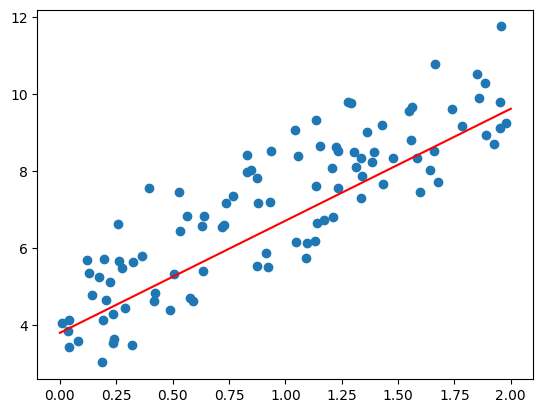

In [ ]:
# plots the obtained hypothesis
x_pred = np.array([[0], [2]])
y_pred = theta[0] + theta[1] * x_pred

plt.scatter(x, y)
plt.plot(x_pred, y_pred, '-r')
plt.show()

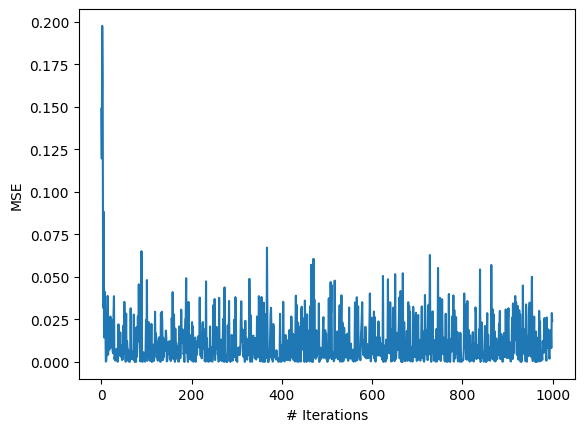

In [ ]:
# history of cost (MSE history)
plt.plot(range(len(costs)), costs)
plt.xlabel("# Iterations")
plt.ylabel("MSE")
plt.show()

## Scikit Implementation

### Batch Gradient Descent

In [ ]:
# Scikit training
from sklearn.linear_model import LinearRegression
batch_regressor = LinearRegression()
batch_regressor.fit(x, y)

LinearRegression()

In [ ]:
# predicts a y value for a given x
x_pred = float(input('Provide a value for x: '))
y_pred = batch_regressor.predict([[x_pred]])

print('new x:', x_pred)
print('predicted y:', y_pred)

Provide a value for x: 77
new x: 77.0
predicted y: [[232.7941494]]


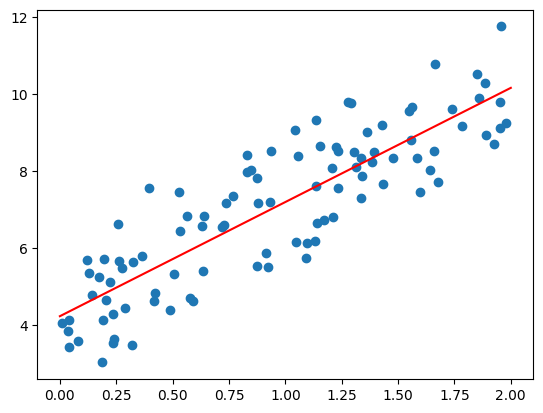

In [ ]:
# plots the obtained hypothesis
x_pred = np.array([[0], [2]])
y_pred = batch_regressor.predict(x_pred)

plt.scatter(x, y)
plt.plot(x_pred, y_pred, '-r')
plt.show()

### Stochastic Gradient Descent

In [ ]:
# Scikit training
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor()
sgd_regressor.fit(x, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [ ]:
# predicts a y value for a given x
x_pred = float(input('Provide a value for x: '))
y_pred = sgd_regressor.predict([[x_pred]])

print('new x:', x_pred)
print('predicted y:', y_pred)

Provide a value for x: 45
new x: 45.0
predicted y: [151.0833398]


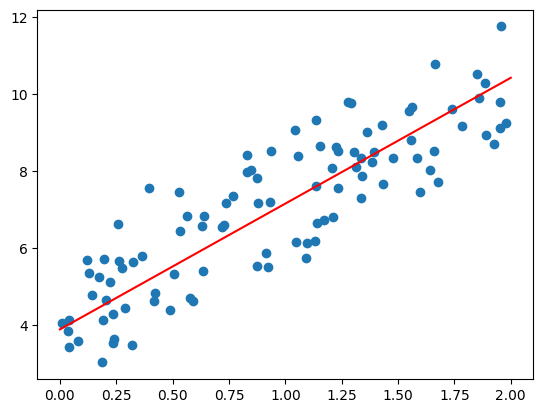

In [ ]:
# plots the obtained hypothesis
x_pred = np.array([[0], [2]])
y_pred = sgd_regressor.predict(x_pred)

plt.scatter(x, y)
plt.plot(x_pred, y_pred, '-r')
plt.show()

## Normal Equation

In [ ]:
# function that leverages the Normal Equation to analytically
# compute the parameters of a multivariate linear regression onto
# the given data
#
# Parameters
# x: values of the m-dimensional explanatory variable in row-wise sample format
# y: values of the response variable in row-wise sample format
#
# This is an analytical method; there are no more parameters!
#
# Returns the computed theta values (row-wise).
def analytical_lin_reg(x, y):
  # add x0 = 1.0 to each x instance
  x_b = np.c_[np.ones((len(x), 1)), x]

  # theta = (x^T x)^(-1) x^T y
  theta = np.linalg.inv(x_b.transpose() @ x_b) @  x_b.transpose() @ y
  return theta

In [ ]:
# calls the NE function
theta = analytical_lin_reg(x, y)
print('theta values:\n', theta)

theta values:
 [[4.22215108]
 [2.96846751]]


In [ ]:
# predicts a y value for a given x
x_pred = float(input('Provide a value for x: '))
y_pred = theta[0] + theta[1] * x_pred

print('new x:', x_pred)
print('predicted y:', y_pred)

Provide a value for x: 56
new x: 56.0
predicted y: [170.45633168]


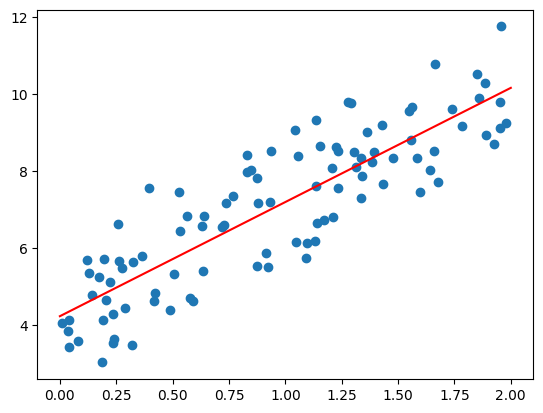

In [ ]:
# plots the obtained model
x_pred = np.array([[0], [2]])
y_pred = theta[0] + theta[1] * x_pred

plt.scatter(x, y)
plt.plot(x_pred, y_pred, '-r')
plt.show()

## Polynomial Regression

### Toy-case Data Loading

In [ ]:
# downloads the toycase dataset for learning Linear Regression
!pip install gdown==v5.1.0
!gdown 1LnJvQ-RH6TbY_AmkNDQT9OF0XQFhIL4H

Downloading...
From: https://drive.google.com/uc?id=1LnJvQ-RH6TbY_AmkNDQT9OF0XQFhIL4H
To: /content/toycase_3.csv
100% 3.88k/3.88k [00:00<00:00, 15.1MB/s]


In [ ]:
# loads the toy-case dataset into memory
df_data = pd.read_csv('/content/toycase_3.csv')

# prints info
print('Data shape:', df_data.shape)

# first 5 samples
df_data.head(5)

Data shape: (100, 2)


,x,y
0,0.292881,1.170621
1,1.291136,5.025479
2,0.616580,3.272328
3,0.269299,0.769316
4,-0.458071,3.135096


In [ ]:
# data in numpy array format
x = df_data['x'].values.reshape(len(df_data), 1)
print('x shape:', x.shape)

y = df_data['y'].values.reshape(len(df_data), 1)
print('y shape:', y.shape)

x shape: (100, 1)
y shape: (100, 1)


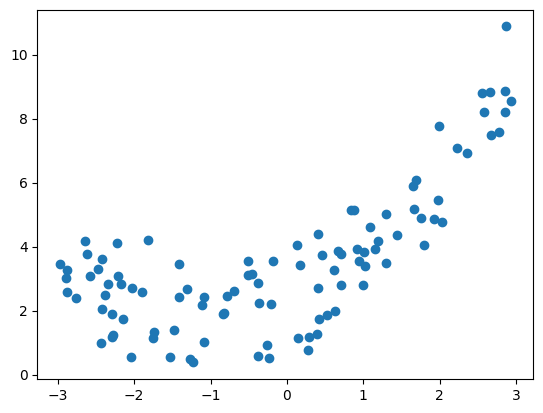

In [ ]:
# data graph
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

### 1-degree Linear Regression

In [ ]:
# Scikit training
from sklearn.linear_model import LinearRegression
regressor_d1 = LinearRegression()
regressor_d1.fit(x, y)

LinearRegression()

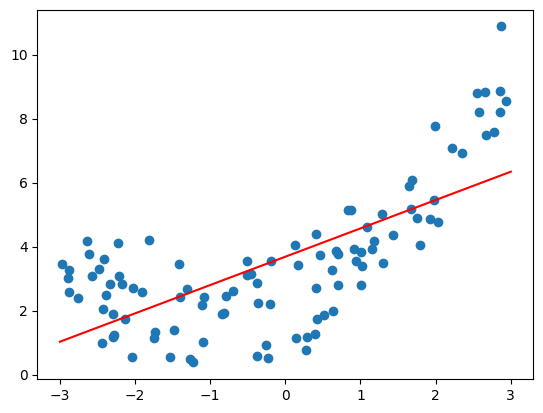

In [ ]:
# plots the obtained hypothesis
x_pred = np.linspace(-3, 3, 50).reshape(50, 1) # 50 x numbers between -3 and 3
y_pred_d1 = regressor_d1.predict(x_pred)

plt.scatter(x, y)
plt.plot(x_pred, y_pred_d1, '-r')
plt.show()

### 2-degree Polynomial Regression

In [ ]:
# Scikit usage
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree = 2

# adds polynomial terms to x
poly_d2_term_adder = PolynomialFeatures(degree=degree)
x_poly_d2 = poly_d2_term_adder.fit_transform(x)
print("x original shape:", x.shape)
print("x new shape after adding polynomial terms:", x_poly_d2.shape)

# Scikit linear regression onto x_poly_2d
regressor_d2 = LinearRegression()
regressor_d2.fit(x_poly_d2, y)
print('Computed theta:', regressor_d2.coef_)

x original shape: (100, 1)
x new shape after adding polynomial terms: (100, 3)
Computed theta: [[0.         0.97906552 0.44978823]]


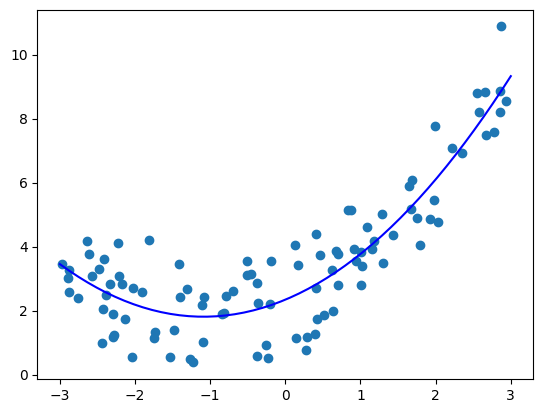

In [ ]:
# plots the obtained hypothesis
x_pred = np.linspace(-3, 3, 50).reshape(50, 1) # 50 x numbers between -3 and 3
x_pred_d2 = poly_d2_term_adder.transform(x_pred)

y_pred_d2 = regressor_d2.predict(x_pred_d2)

plt.scatter(x, y)
plt.plot(x_pred, y_pred_d2, '-b')
plt.show()

### 25-degree Polynommial Regression

In [ ]:
# Scikit usage
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree = 25

# adds polynomial terms to x
poly_d25_term_adder = PolynomialFeatures(degree=degree)
x_poly_d25 = poly_d25_term_adder.fit_transform(x)
print("x original shape:", x.shape)
print("x new shape after adding polynomial terms:", x_poly_d25.shape)

# Scikit linear regression onto x_poly_2d
regressor_d25 = LinearRegression()
regressor_d25.fit(x_poly_d25, y)
print('Computed theta:', regressor_d25.coef_.shape)

x original shape: (100, 1)
x new shape after adding polynomial terms: (100, 26)
Computed theta: (1, 26)


In [ ]:
# plots the obtained hypothesis
x_pred = np.linspace(-3, 3, 50).reshape(50, 1) # 50 x numbers between -3 and 3
x_pred_d25 = poly_d25_term_adder.transform(x_pred)

y_pred_d25 = regressor_d25.predict(x_pred_d25)

plt.scatter(x, y)
plt.plot(x_pred, y_pred_d25, '-g')
plt.ylim([0, 12])
plt.show()

In [ ]:
# all plots together
plt.scatter(x, y)
plt.plot(x_pred, y_pred_d1, '-r')
plt.plot(x_pred, y_pred_d2, '-b')
plt.plot(x_pred, y_pred_d25, '-g')
plt.ylim([0, 12])
plt.show()

### Underfitting and Overfitting

In [ ]:
# scikit learn support to plot learning curves
# 1-degree linear regression
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# linear regressor
regressor = LinearRegression()
regressor.fit(x, y)

# learning-curve scikit function
train_sizes, train_scores, valid_scores = learning_curve(
    regressor, x, y, train_sizes = np.linspace(0.01, 1.0, 50),
    scoring="neg_mean_squared_error"
)

# errors as the opposite of the scores
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# graph plot
plt.plot(train_sizes, train_errors, 'r-', label='train')
plt.plot(train_sizes, valid_errors, 'b-', label='validation')
plt.ylim([0, 5])
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 2-degree linear regression
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

# adds polynomial terms to x
poly_term_adder = PolynomialFeatures(degree=2)
x_poly = poly_term_adder.fit_transform(x)

# linear regressor
regressor = LinearRegression()
regressor.fit(x_poly, y)

# learning-curve scikit function
train_sizes, train_scores, valid_scores = learning_curve(
    regressor, x_poly, y, train_sizes = np.linspace(0.01, 1.0, 50),
    scoring="neg_mean_squared_error"
)

# errors as the opposite of the scores
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# graph plot
plt.plot(train_sizes, train_errors, 'r-', label='train')
plt.plot(train_sizes, valid_errors, 'b-', label='validation')
plt.ylim([0, 5])
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 10-degree linear regression
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

# adds polynomial terms to x
poly_term_adder = PolynomialFeatures(degree=10)
x_poly = poly_term_adder.fit_transform(x)

# linear regressor
regressor = LinearRegression()
regressor.fit(x_poly, y)

# learning-curve scikit function
train_sizes, train_scores, valid_scores = learning_curve(
    regressor, x_poly, y, train_sizes = np.linspace(0.01, 1.0, 50),
    scoring="neg_mean_squared_error"
)

# errors as the opposite of the scores
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# graph plot
plt.plot(train_sizes, train_errors, 'r-', label='train')
plt.plot(train_sizes, valid_errors, 'b-', label='validation')
plt.ylim([0, 5])
plt.legend()
plt.grid()
plt.show()

## Regularization

### Lasso Regression

In [ ]:
# no regularization
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# tested poly degree
degree = 25

# adds polynomial terms to x
poly_term_adder = PolynomialFeatures(degree=degree)
x_poly = poly_term_adder.fit_transform(x)

# Scikit linear regression onto x_poly
regressor_noreg = LinearRegression()
regressor_noreg.fit(x_poly, y)
print('Computed theta:', regressor_noreg.coef_)

In [ ]:
# scikit implementation
from sklearn.linear_model import Lasso

# gamma of 0.1
gamma = 0.1

# Scikit linear regression onto x_poly
regressor_g0_1 = Lasso(alpha=gamma) # gamma is called alpha in scikit learn; do not confuse with the learning rate
regressor_g0_1.fit(x_poly, y)
print('Computed theta:', regressor_g0_1.coef_)

In [ ]:
from sklearn.linear_model import Lasso

# gamma of 1.0
gamma = 1.0

# Scikit linear regression onto x_poly
regressor_g1 = Lasso(alpha=gamma) # gamma is called alpha in scikit learn; do not confuse with the learning rate
regressor_g1.fit(x_poly, y)
print('Computed theta:', regressor_g1.coef_)

In [ ]:
# all Lasso regression plotted together
# x values to predict y
x_pred = np.linspace(-3, 3, 50).reshape(50, 1) # 50 x numbers between -3 and 3
x_pred_poly = poly_term_adder.transform(x_pred)

# predicted y for no regularization
y_pred_noreg = regressor_noreg.predict(x_pred_poly)

# predicted y for Lasso gamma 0.1
y_pred_g0_1 = regressor_g0_1.predict(x_pred_poly)

# predicted y for Lasso gamma 1.0
y_pred_g1 = regressor_g1.predict(x_pred_poly)

# plots
plt.scatter(x, y)
plt.plot(x_pred, y_pred_noreg, '-b', label='no reg')
plt.plot(x_pred, y_pred_g0_1, '-r', label='gamma=0.1')
plt.plot(x_pred, y_pred_g1, '-g', label='gamma=1.0')
plt.ylim([0, 12])
plt.legend()
plt.grid()
plt.show()

## Ridge Regulzarization

In [ ]:
# no regularization
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# tested poly degree
degree = 25

# adds polynomial terms to x
poly_term_adder = PolynomialFeatures(degree=degree)
x_poly = poly_term_adder.fit_transform(x)

# Scikit linear regression onto x_poly
regressor_noreg = LinearRegression()
regressor_noreg.fit(x_poly, y)
print('Computed theta:', regressor_noreg.coef_)

In [ ]:
# scikit implementation
from sklearn.linear_model import Ridge

# gamma of 0.1
gamma = 0.1

# Scikit linear regression onto x_poly
regressor_g0_1 = Ridge(alpha=gamma) # gamma is called alpha in scikit learn; do not confuse with the learning rate
regressor_g0_1.fit(x_poly, y)
print('Computed theta:', regressor_g0_1.coef_)


In [ ]:
from sklearn.linear_model import Ridge

# gamma of 1.0
gamma = 1.0

# Scikit linear regression onto x_poly
regressor_g1 = Ridge(alpha=gamma) # gamma is called alpha in scikit learn; do not confuse with the learning rate
regressor_g1.fit(x_poly, y)
print('Computed theta:', regressor_g1.coef_)

In [ ]:
# all Ridge regression plotted together
# x values to predict y
x_pred = np.linspace(-3, 3, 50).reshape(50, 1) # 50 x numbers between -3 and 3
x_pred_poly = poly_term_adder.transform(x_pred)

# predicted y for no regularization
y_pred_noreg = regressor_noreg.predict(x_pred_poly)

# predicted y for Lasso gamma 0.1
y_pred_g0_1 = regressor_g0_1.predict(x_pred_poly)

# predicted y for Lasso gamma 1.0
y_pred_g1 = regressor_g1.predict(x_pred_poly)

# plots
plt.scatter(x, y)
plt.plot(x_pred, y_pred_noreg, '-b', label='no reg')
plt.plot(x_pred, y_pred_g0_1, '-r', label='gamma=0.1')
plt.plot(x_pred, y_pred_g1, '-g', label='gamma=1.0')
plt.ylim([0, 12])
plt.legend()
plt.grid()
plt.show()

## Activity

Download the "Real Estate Dataset" (see the code cells below) and build two different linear regression models to
estimate the house price of unit area.

The two models can differ in any aspect, including different meta-parameters, such as distinct learning rates, polynomial degrees, or regularization weights.

Compare the two obtained models considering the following aspects:
* Occurrence of underfitting or overfitting;
* Average Mean Squared Error (MSE) on a test partition; clearly explain what was the best model.

Pre-process the data before training the linear regression models. Apply any pre-processing operation that you deem necessary. Split the data into train and test partitions, and report the models' performance (MSE) on the test partition.

Make sure not to mix train and test partitions.   
**Do not contaminate the data!**

In [1]:
# download the real estate dataset
!pip install gdown==v5.1.0
!gdown 104leUf2rGt94bzu6_HarB9CsUfw3HlPS

  Attempting uninstall: gdown
    Found existing installation: gdown 5.2.0
    Uninstalling gdown-5.2.0:
      Successfully uninstalled gdown-5.2.0
Downloading...
From: https://drive.google.com/uc?id=104leUf2rGt94bzu6_HarB9CsUfw3HlPS
To: /content/real_estate.csv
100% 22.0k/22.0k [00:00<00:00, 36.2MB/s]


In [2]:
# loads the  dataset into memory
import pandas as pd
df_re = pd.read_csv('/content/real_estate.csv')

# prints info
print('Data shape:', df_re.shape)

# first 5 samples
df_re.head(5)

Data shape: (414, 8)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
# strips X and y values
# X: 414 row-wise samples and 7 column-wise attributes
# y: 414 row-wise price of unite area
X = df_re.values[:, :-1] # all lines and all colmumns but the last one
y = df_re.values[:, -1].reshape((len(X), 1)) # all lines and only the last column
print(X.shape, y.shape)

(414, 7) (414, 1)


(414, 6)
X_train shape: (331, 6)
X_test shape: (83, 6)
y_train shape: (331, 1)
y_test shape: (83, 1)
(331, 84) (83, 84)
MSE train: 50.09038702180595
MSE test: 48.72287232026786


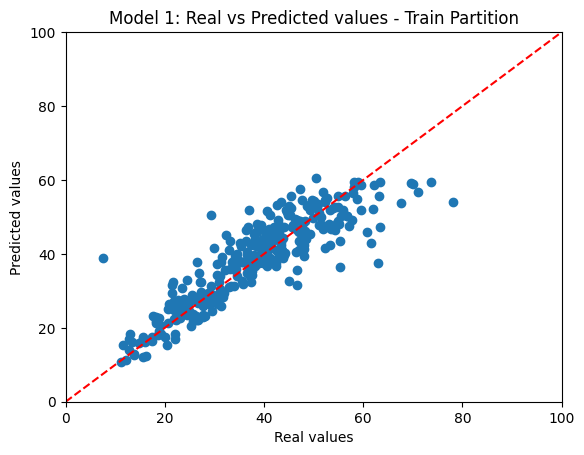

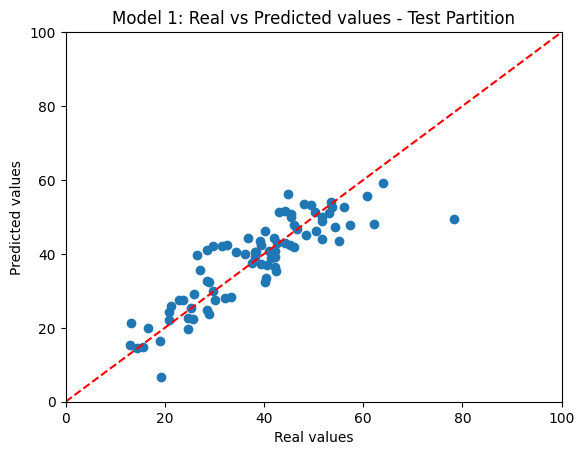

Model is neither overfitting nor underfitting.


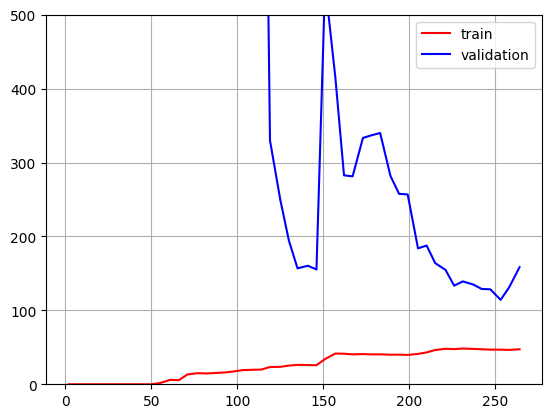

Model 1 Analysis: After examining the train/validation graph, I would
 say that the model is overfitting. The validation error
 is significantly higher than the training error. This suggests that
 the model is learning well on the train set but is failing to
 generalize to new/validation set.


Model 2 (Polynomial Degree 2, Ridge Regression) Results:
MSE (Train): 65.01
MSE (Test): 52.77


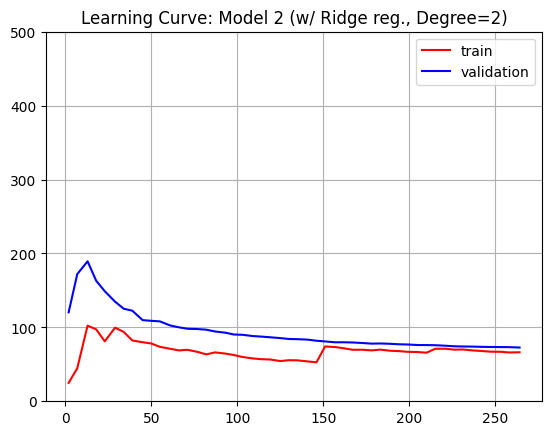

Model 2 Analysis and Overall Comparison:
The ridge regularization should be correctly preventing extreme
coeff. values, which should reduce the variance between valid and
train sets. Trying different alpha values for the ridge reg. might
produce a better graph. This should result in lower overfitting.
General comparison to M1: The test MSE is a lot closer to the train MSE
compared to that of model_1. Reducing the polynomial degree (to 2)
ensures model_2 captures non-linear trends w/o too much flexibility.

One issue I had is that when reducing the degree to limit flexibility,
I was getting a lot of collinearity, which was resulting in a feature
matrix that was nearly singular (high multicollin). Since the features
become highly correlated, the Ridge reg. has a difficult time.
Fixed this by increasing alpha value for Ridge significantly and
using StandardScaler to normalize fts before polynomial expanding them.


In [17]:
# add your code here

# 01 - Data pre-processing
df_re.isnull().sum()

# drop first column
X = df_re.drop('No', axis=1).values[:, :-1]
print(X.shape)

# split the data into train and test
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

# linear regression model 1: no PCA, degree of 2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree = 3

# add polynomial terms to the data
poly_term_adder = PolynomialFeatures(degree=degree)
X_train_poly = poly_term_adder.fit_transform(X_train)
X_test_poly = poly_term_adder.transform(X_test)

print(X_train_poly.shape, X_test_poly.shape)

# Linear regression on polynomial features
model_1 = LinearRegression()
model_1.fit(X_train_poly, y_train)

# predict values on train and test partitions
y_train_pred_1 = model_1.predict(X_train_poly) # "contaminated" results just for checking
y_test_pred_1 = model_1.predict(X_test_poly)

# compute MSE error
from sklearn.metrics import mean_squared_error

mse_train_1 = mean_squared_error(y_train, y_train_pred_1)
mse_test_1 = mean_squared_error(y_test, y_test_pred_1)

print('MSE train:', mse_train_1)
print('MSE test:', mse_test_1)

# exploration: plot graph with deviations of predicted values
plt.scatter(y_train, y_train_pred_1)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Model 1: Real vs Predicted values - Train Partition')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.plot([0, 100], [0, 100], 'r--')
plt.show()

import matplotlib.pyplot as plt

# exploration: plot graph with deviations of predicted values
plt.scatter(y_test, y_test_pred_1)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Model 1: Real vs Predicted values - Test Partition')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.plot([0, 100], [0, 100], 'r--')
plt.show()

# tests under- and over-fitting (contaminated version)
# Daniel: I don't recommend using this approach.
if mse_train_1 < mse_test_1 * 0.9:
    print('Model 1 is overfitting.')
elif mse_train_1 > mse_test_1 * 1.1:
    print('Model 1 is underfitting.')
else:
    print("Model is neither overfitting nor underfitting.")

# over- and under-fitting analysis with k-folding and validation partition
# scikit learn support to plot learning curves
# 1-degree linear regression
from sklearn.model_selection import learning_curve
import numpy as np

# learning-curve scikit function
train_sizes, train_scores, valid_scores = learning_curve(
    model_1, X_train_poly, y_train, train_sizes = np.linspace(0.01, 1.0, 50),
    scoring="neg_mean_squared_error"
)

# errors as the opposite of the scores
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# graph plot
plt.plot(train_sizes, train_errors, 'r-', label='train')
plt.plot(train_sizes, valid_errors, 'b-', label='validation')
plt.ylim([0, 500])
plt.legend()
plt.grid()
plt.show()

print("Model 1 Analysis: After examining the train/validation graph, I would\n " +
      "say that the model is overfitting. The validation error\n " +
      "is significantly higher than the training error. This suggests that\n " +
      "the model is learning well on the train set but is failing to\n " +
      "generalize to new/validation set.\n\n")

# linear regression model 2: PCA, degree of 2 (ridge regularizing)
# train mse should be higher than model 1, test mse should be lower
# less overfitting should be achieved

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

# model params
degree_2 = 2
alpha = 100.0 # regularizing strength for ridge reg.

n_comps = min(X_train.shape[1], 10)
# should reduce problem of correlated features by limiting to 10 fts.

# Polynomial feature transformation + Ridge reg
model_2 = make_pipeline(StandardScaler(), PolynomialFeatures(degree_2), Ridge(alpha=alpha))
# using PCA above to remove redundant inform. from correlated fts.
# only most key fts. are kept


# fit train
model_2.fit(X_train, y_train)
y_train_pred_2 = model_2.predict(X_train)
y_test_pred_2 = model_2.predict(X_test)

# computing mse
mse_train_2 = mean_squared_error(y_train, y_train_pred_2)
mse_test_2 = mean_squared_error(y_test, y_test_pred_2)

print(f'Model 2 (Polynomial Degree {degree_2}, Ridge Regression) Results:')
print(f'MSE (Train): {mse_train_2:.2f}')
print(f'MSE (Test): {mse_test_2:.2f}')

# model learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    model_2, X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 50),
    scoring="neg_mean_squared_error"
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# plotting learning curve
plt.plot(train_sizes, train_errors, 'r-', label='train')
plt.plot(train_sizes, valid_errors, 'b-', label='validation')
plt.ylim([0, 500])
plt.legend()
plt.grid()
plt.title("Learning Curve: Model 2 (w/ Ridge reg., Degree=2)")
plt.show()

print("Model 2 Analysis and Overall Comparison:\n" +
      "The ridge regularization should be correctly preventing extreme\n" +
      "coeff. values, which should reduce the variance between valid and\n" +
      "train sets. Trying different alpha values for the ridge reg. might\n" +
      "produce a better graph. This should result in lower overfitting.\n" +
      "General comparison to M1: The test MSE is a lot closer to the train MSE\n" +
      "compared to that of model_1. Reducing the polynomial degree (to 2)\n" +
      "ensures model_2 captures non-linear trends w/o too much flexibility.\n")

print("One issue I had is that when reducing the degree to limit flexibility,\n" +
      "I was getting a lot of collinearity, which was resulting in a feature\n" +
      "matrix that was nearly singular (high multicollin). Since the features\n" +
      "become highly correlated, the Ridge reg. has a difficult time.\n" +
      "Fixed this by increasing alpha value for Ridge significantly and\n" +
      "using StandardScaler to normalize fts before polynomial expanding them.")
